<a href="https://colab.research.google.com/github/AyusheeMittal/legendary-guide/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


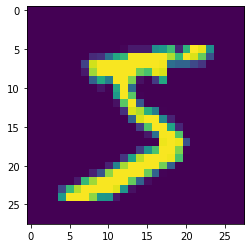

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(10,(1, 1)))


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)         

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/10





60000/60000 [==============================] - 32s 529us/step - loss: 0.1696 - acc: 0.9477
Epoch 2/10
60000/60000 [==============================] - 29s 486us/step - loss: 0.0554 - acc: 0.9841
Epoch 3/10
60000/60000 [==============================] - 30s 495us/step - loss: 0.0437 - acc: 0.9872
Epoch 4/10
60000/60000 [==============================] - 29s 481us/step - loss: 0.0330 - acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 29s 491us/step - loss: 0.0286 - acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.0244 - acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 29s 488us/step - loss: 0.0208 - acc: 0.9935
Epoch 8/10
60000/60000 [==============================] - 28s 475us/step - loss: 0.0181 - acc: 0.9944
Epoch 9/10
60000/60000 [==============================] - 29s 478us/step - loss: 0.0160 - acc: 0.9950
Epoch 10/10
60000/60000 [==============================] - 29s 481us/step 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.038257713587692754, 0.9915]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[2.92801634e-12 1.09043596e-09 2.93848140e-10 4.16559703e-10
  2.53280197e-09 1.39954810e-11 4.89401542e-14 1.00000000e+00
  4.61253323e-13 2.16155427e-09]
 [5.38262063e-20 2.62736881e-14 1.00000000e+00 4.35060543e-13
  7.17296854e-19 1.30942846e-18 1.11015992e-14 2.06576767e-15
  5.55877484e-15 1.67587904e-16]
 [2.54130755e-14 1.00000000e+00 1.43187261e-13 7.53930209e-16
  2.54680662e-13 1.72177377e-13 5.60483429e-14 4.76570250e-08
  3.33432899e-11 2.12384745e-11]
 [1.00000000e+00 2.04179431e-15 2.67207504e-14 2.40226263e-12
  4.68130851e-14 1.20074925e-14 1.57967372e-11 5.14169599e-14
  2.11868782e-12 3.13323065e-12]
 [1.35030745e-12 2.49484189e-09 8.82347251e-11 3.11874415e-10
  9.99999642e-01 4.11651269e-11 1.64943202e-07 1.09576526e-08
  6.75674272e-08 2.19462777e-07]
 [1.75041261e-17 1.00000000e+00 5.11213924e-16 2.04852991e-20
  6.80145540e-16 1.70794119e-17 3.29176624e-17 8.45174819e-10
  2.92393368e-14 4.24658071e-14]
 [2.87917801e-10 3.79016228e-07 9.65843960e-10 4.62534366e

In [18]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print (layer_dict["conv2d_2"].output)

Tensor("conv2d_2/Relu:0", shape=(?, 24, 24, 32), dtype=float32)


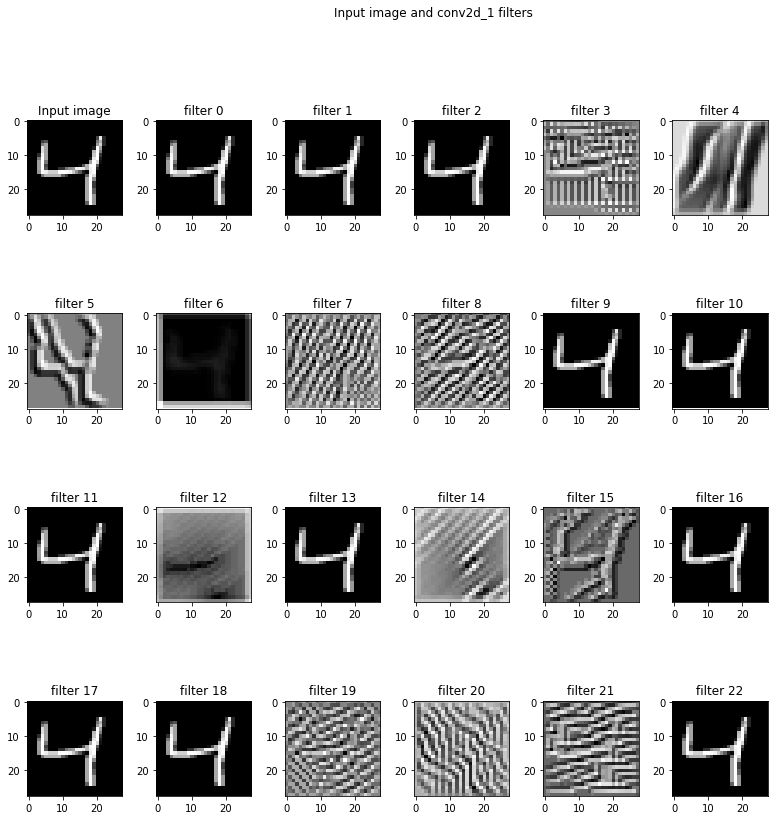

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
      
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()